In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.array([95,85,80,70,60])
y = np.array([85,95,70,65,70])

In [3]:
model = np.polyfit(x, y, 1)

In [4]:
model

array([ 0.64383562, 26.78082192])

In [5]:
predict = np.poly1d(model)
predict

poly1d([ 0.64383562, 26.78082192])

In [6]:
predict(94)

87.30136986301368

In [7]:
y_pred = predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [8]:
from sklearn.metrics import r2_score

In [9]:
r2_score(y, y_pred)

0.4803218090889326

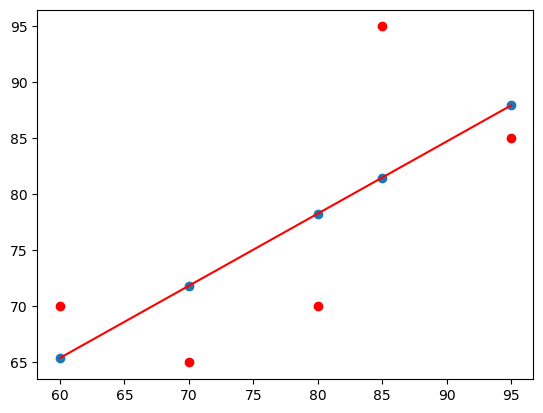

In [10]:
y_line = model[1]+model[0]*x
plt.plot(x, y_line, c = 'r')
plt.scatter(x, y_pred)
plt.scatter(x, y, c = 'r')

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [12]:
data = pd.DataFrame(boston.data)

In [13]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
data['PRICE'] = boston.target

In [15]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [16]:
x = data.drop(['PRICE'],axis = 1)
y = data['PRICE']

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
model = lm.fit(xtrain, ytrain)

In [19]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [20]:
df = pd.DataFrame(ytrain_pred, ytrain)
df = pd.DataFrame(ytest_pred, ytest)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ytest_pred)
print(mse)
mse = mean_squared_error(ytrain_pred,ytrain)
print(mse)

33.44897999767653
19.326470203585725


In [22]:
mse = mean_squared_error(ytest, ytest_pred)
print(mse)

33.44897999767653


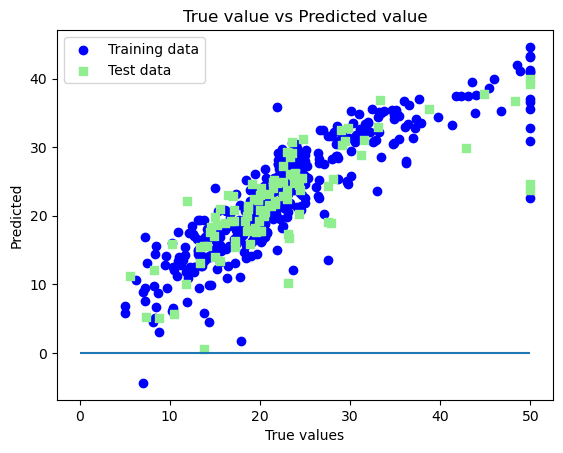

In [24]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data') 
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data') 
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left') 
#plt.hlines(y=0,xmin=0,xmax=50)
plt.plot() 
plt.show()